# Tutorial #4 Agents

In [2]:
%load_ext autoreload
%autoreload 2

In this tutorial we compare agents from classic RL and GPP

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import umap

from environments.gridworlds.gridworlds_classic import FourRoom
from agents.pgp.pgp_softmax import SoftMaxPGP
from agents.classics import DynaQ, Reinforce
from plots.gridworlds.gridworld_visualizer import GridWorldVisualizer

In [4]:
n = 1000
alpha = 0.01

In [5]:
class SoftMaxPGPComparable(SoftMaxPGP):

    @property
    def p_t(self):
        policies = np.ndarray(self.theta_t.shape)
        for t in range(policies.shape[0]):
            self.load_history_policy(t)
            policies[t] = self.policy_vec()

        # Put back most recent policy
        self.load_history_policy()
        return policies

In [6]:
world = FourRoom(5)

gpp = SoftMaxPGPComparable(world)
dynaq = DynaQ(world, epsilon=0.5)
reinf = Reinforce(world)

vizGpp = GridWorldVisualizer(world, gpp)
vizDynaq = GridWorldVisualizer(world, dynaq)
vizReinf = GridWorldVisualizer(world, reinf)

agents = [reinf, dynaq, gpp]
vizs = [vizReinf, vizDynaq, vizGpp]

/home/fran-tr/Workspace/gpp_core/utils/policy_functions.py:43: RuntimeWarning: divide by zero encountered in log
  return np.log(agent.A / np.sum(agent.A, axis=1, keepdims=True))
/home/fran-tr/Workspace/gpp_core/agents/classics.py:185: RuntimeWarning: divide by zero encountered in log
  self.theta = np.log(self.A / np.sum(self.A, axis=1, keepdims=True))


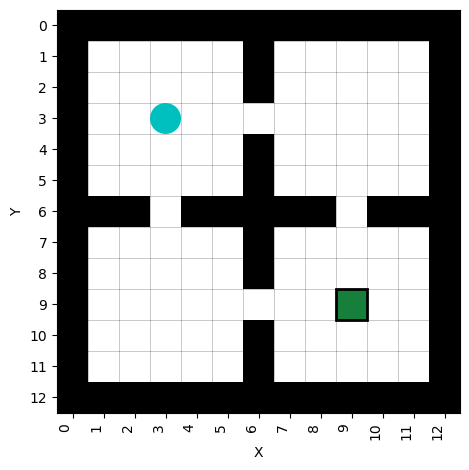

In [7]:
vizs[0].plot_maze()
plt.tight_layout()


Let's visualize the value function V(S) for the uniform policy π_uni for all state positions


reinforce V_π0(s) = 
agent reinforce has no value representation

dynaq V_π0(s) = 
agent dynaq has no value representation

pgp_softmax V_π0(s) = 


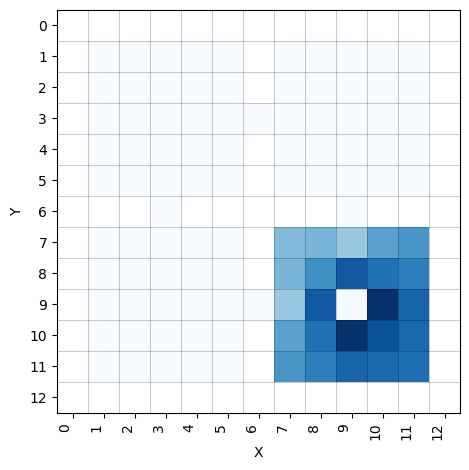

In [8]:
for a, v in zip(agents, vizs):
    try:
        print("")
        print("{} V_π0(s) = ".format(a.name))
        v.plot_grid(a.V)
        plt.tight_layout()
        plt.show()

    except:
        print("agent {} has no value representation".format(a.name))

### Learning

Now let's train our agents.

In [9]:
dynaq.reset()
print("training dynaq")
dynaq.learn(n_episodes=int(n/4), n_steps=1000, n_replay=4, alpha=alpha)

reinf.reset()
print("training reinforce")
reinf.learn(n_episodes=n, n_steps=1000, alpha=alpha)

gpp.reset()
print("training pgp")
gpp.learn(n_steps=n, alpha=alpha)

training dynaq


100%|██████████| 250/250 [00:05<00:00, 46.40it/s] 


training reinforce


100%|██████████| 1000/1000 [00:25<00:00, 39.99it/s]


training pgp


100%|██████████| 1000/1000 [00:01<00:00, 663.15it/s]


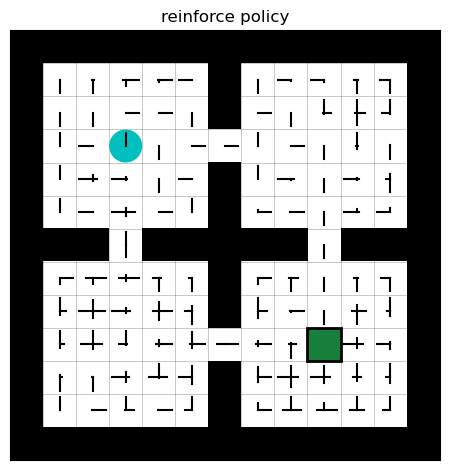

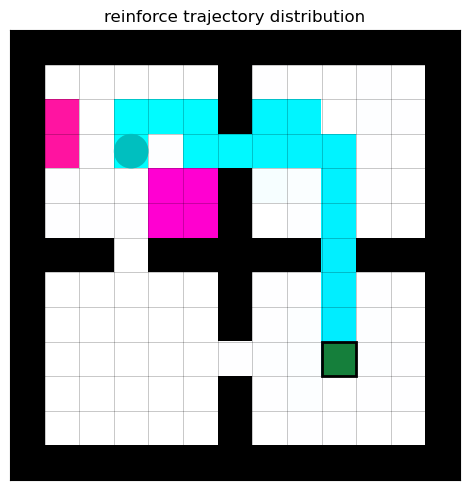

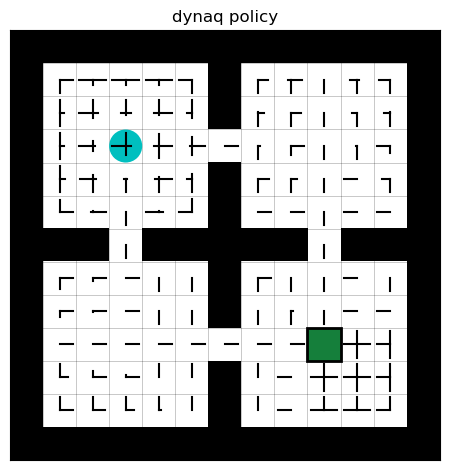

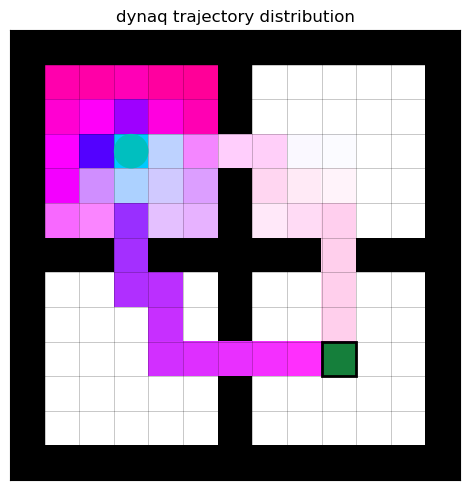

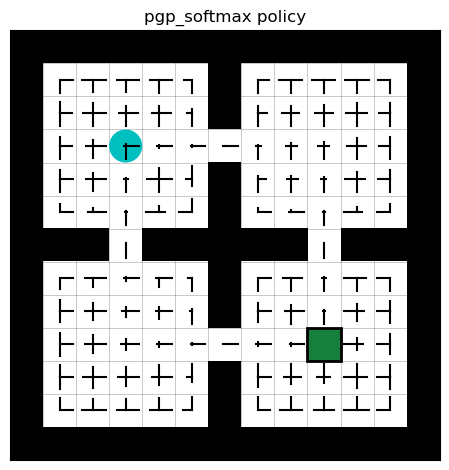

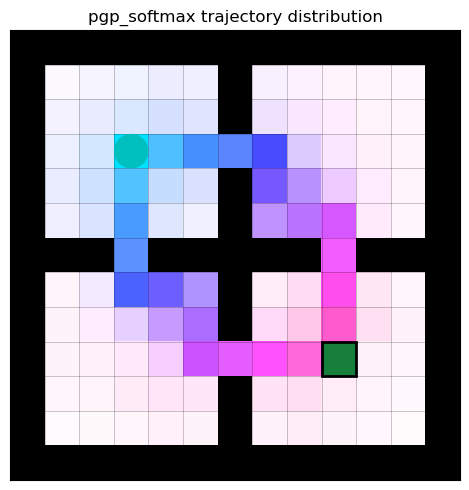

In [10]:
for v in vizs:

    v.plot_policy(plot_axis=False)
    plt.title("{} policy".format(v.agent.name))
    plt.tight_layout()
    plt.show()

    v.plot_trajectory_distribution(plot_axis=False)
    plt.tight_layout()
    plt.title("{} trajectory distribution".format(v.agent.name))
    plt.show()



reinforce V_π0(s) = 
agent reinforce has no value representation

dynaq V_π0(s) = 
agent dynaq has no value representation

pgp_softmax V_π0(s) = 


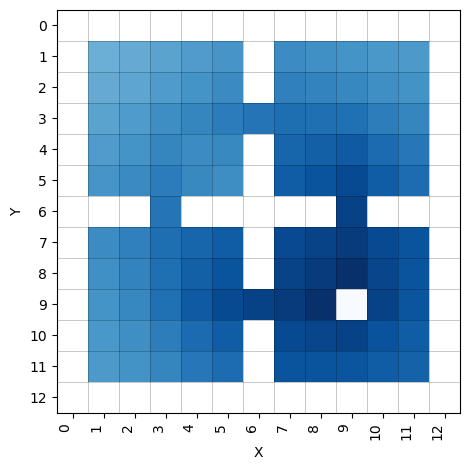

In [11]:
for a, v in zip(agents, vizs):
    try:
        print("")
        print("{} V_π0(s) = ".format(a.name))
        v.plot_grid(a.V)
        plt.tight_layout()
        plt.show()

    except:
        print("agent {} has no value representation".format(a.name))

In [12]:
p = None
l = None
# ss, _, _, _ = gpp.trajectory(greedy=True)
ss = np.arange(world.n_state)

for i, a in enumerate(agents):
    [nt, ns, na] = a.p_t[:, ss, :].shape
    p_tv = a.p_t[:, ss, :].reshape(nt, ns*na)
    lv = np.full(nt, i)

    if (p is None):
        p = p_tv
    else:
        p = np.concatenate([p, p_tv])

    if (l is None):
        l = lv
    else:
        l = np.concatenate([l, lv])




(23, 2)


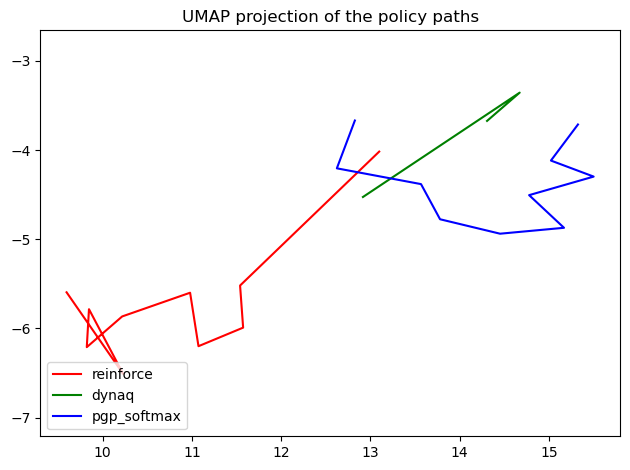

In [13]:
path_skip = 100
colors = ["red", "green", "blue"]

reducer = umap.UMAP()
embedding = reducer.fit_transform(p[::path_skip, :])
print(embedding.shape)

for i, a in enumerate(agents):
    plt.plot(embedding[l[::path_skip]==i, 0], embedding[l[::path_skip]==i, 1], c=colors[i], label=a.name)

plt.legend(loc="lower left")
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the policy paths')
plt.tight_layout()